## Task 3

In [225]:
from utils import *

**Task3.1 Andronov-Hopf bifurcation**

Plot three phase diagrams of the following system:

$$\dot x_1 = \alpha x_1 - x_2 - x_1(x_1^2 + x_2^2)$$
$$\dot x_2 = x_1 + \alpha x_2 - x_2(x_1^2 + x_2^2)$$

In [226]:
odes = ["alpha * x1 - x2 - x1 * (x1 ** 2 + x2 ** 2)", "x1 + alpha * x2 - x2 * (x1 ** 2 + x2 ** 2)"]

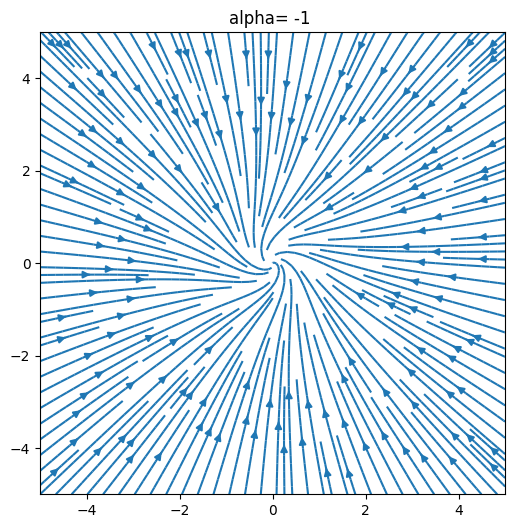

In [227]:
fig = create_phase_portrait_derivative(system=odes, alpha=-1, fig_size=6)

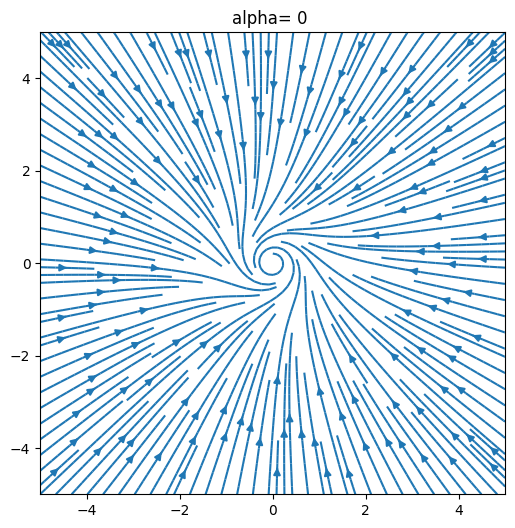

In [228]:
create_phase_portrait_derivative(system=odes, alpha=0, fig_size=6)

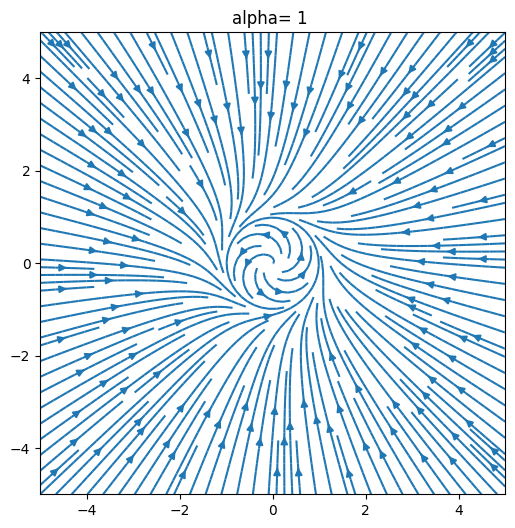

In [229]:
create_phase_portrait_derivative(system=odes, alpha=1, fig_size=6)

**Task3.2 Euler's method to construct and plot a trajectory over the stream plot**

Numerically compute and visualize two orbits of the system forward in time, starting at the
point (2; 0) and at (0:5; 0) for: $\alpha= 1$ 

[2. 0.]


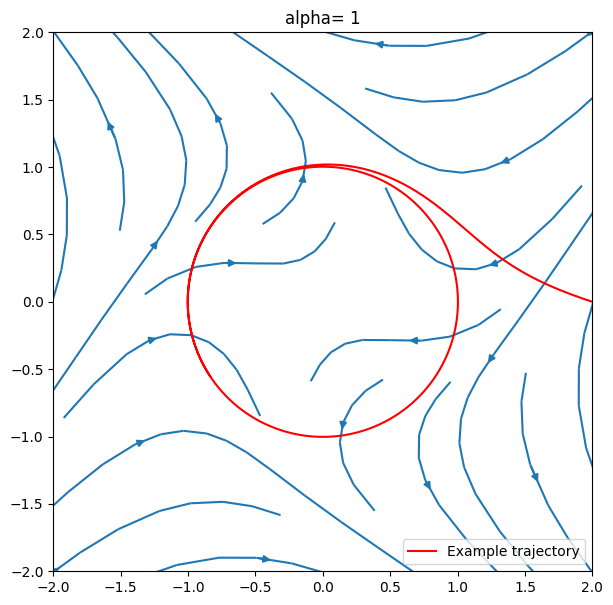

[0.5 0. ]


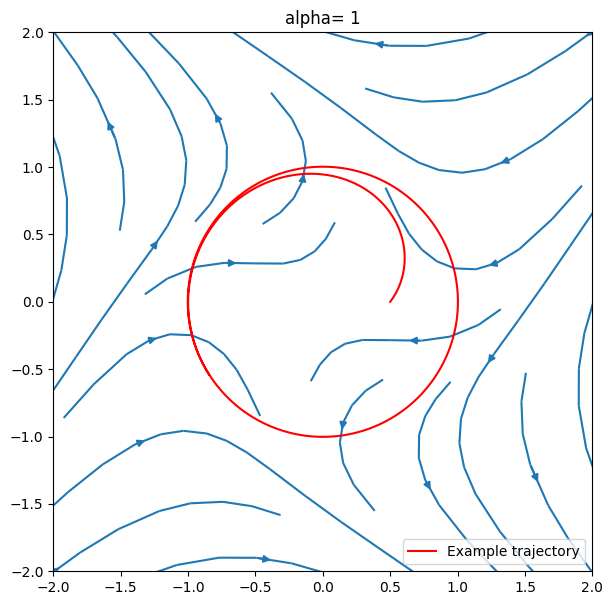

In [230]:
w=5
x = np.mgrid[-w:w:100j, -w:w:100j]
grid_shape = x.shape
x = x.reshape((2,x[0].size)).T
alpha = 1

y0_list = np.array([[2, 0],
                   [0.5, 0]])
time = np.linspace(0, 10, 1000)

for y0 in y0_list:
    print(y0)
    yt, time = solve_euler(lambda y: compute_f(y, alpha), y0, time)
    plot_nonlinear(x, alpha, yt, grid_shape)

**Task3.3 Cusp Bifurcation**

Visualize the bifurcation surface of the $\textit{cusp bifurcation}$ in a 3D plot,

$$\dot x = \alpha_1 + \alpha_2 x - x^3$$

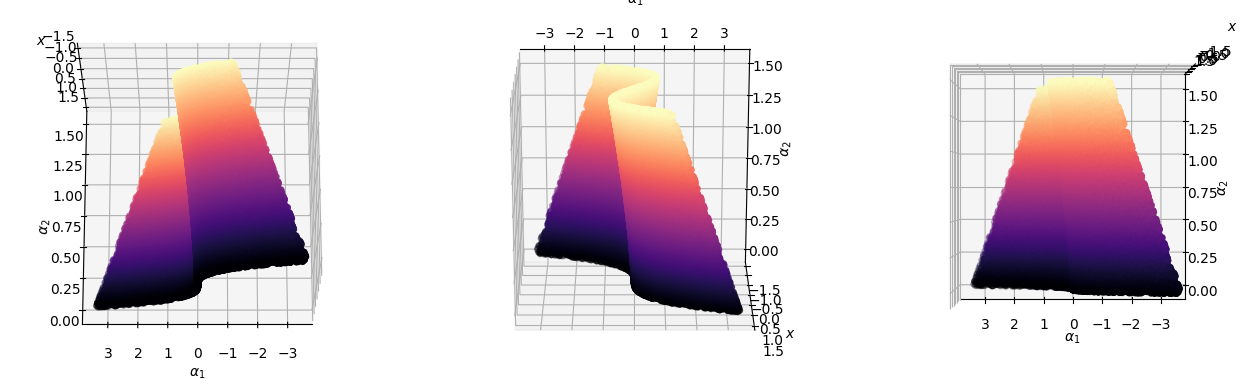

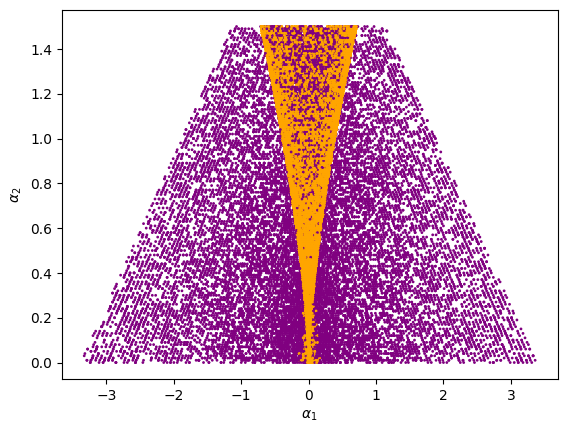

In [231]:
cusp_bifurcation()